# TP2: Regresión del valor de valor medio de casas en distritos de California - Solución

![Districtos de California](resources/ca_map_counties.png "Districtos de California")

## Introducción - California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

## Tareas y preguntas a resolver:

In [11]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set_theme(context='notebook', style='dark')

In [2]:
# Leemos el dataset
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

# Juntamos los datos.
df_housing = pd.concat([X, y], axis=1)

print(f'Datos obtenidos: ')
df_housing.sample(n=5)

Datos obtenidos: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292
2295,2.3333,25.0,5.845161,1.083871,1257.0,2.703226,36.80,-119.75,0.906
11221,3.0789,23.0,3.821229,1.108939,1940.0,5.418994,33.80,-117.90,3.500
1326,3.3371,36.0,4.966972,1.009174,1827.0,3.352294,38.02,-121.89,0.946
13149,4.0250,21.0,5.478936,1.048780,1753.0,3.886918,36.89,-121.37,2.938


In [3]:
# Chequeamos la estadistica principal.
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Chequeamos los tipos de datos.
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Chequeamos valores nulos y NaN.
nan_count = df_housing.isnull().sum().sum()
null_count = df_housing.isnull().sum().sum()

print('Valores NaN: ', nan_count)
print('Valores nulos: ', null_count)

Valores NaN:  0
Valores nulos:  0


In [6]:
# Chequeamos la unicicidad de los atributos.
df_housing.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [ ]:
Tratamiento de outliers.

### Ejericio 1:

> 1. 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

#### Correlación entre los atributos

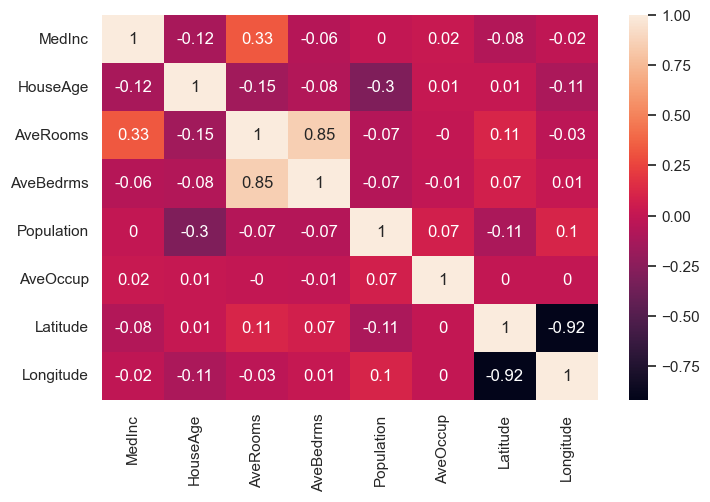

In [7]:
# Correlación entre los atributos.
plt.figure(figsize=(8, 5))
sns.heatmap(data=X.corr().round(2), annot=True)
plt.show()

*Según el mapa de calor, podemos ver que los atributos que están más relacionados son la cantidad de habitaciones junto la cantidad de cuartos de dormir (bedrooms). Esto parece lógico, en el sentido de que un conjunto pertenece a otro (cuartos de dormir es subconjunto de habitaciones). Y la latitud y longitud.*

#### Correlación entre la variable objetivo

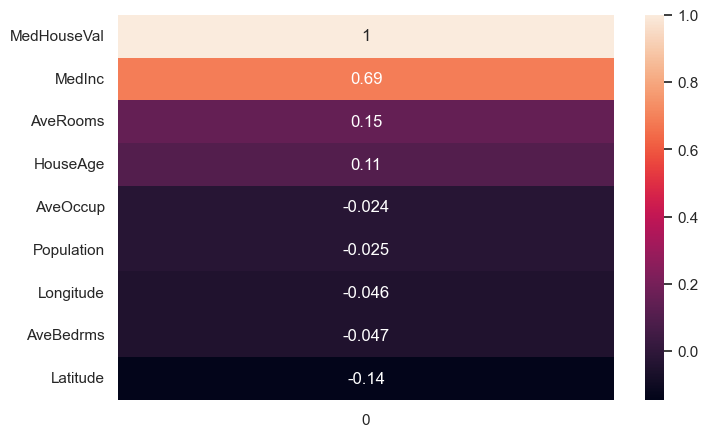

In [8]:
# Correlación con la variable objetivo.
plt.figure(figsize=(8,5))
sns.heatmap(data=pd.DataFrame(df_housing.corrwith(df_housing['MedHouseVal']).sort_values(ascending=False)), annot=True)
plt.show()

*Podemos observar que el atributo MedInc tiene una alta relación lineal con la variable objetivo.*

### Ejericio 2:

> 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

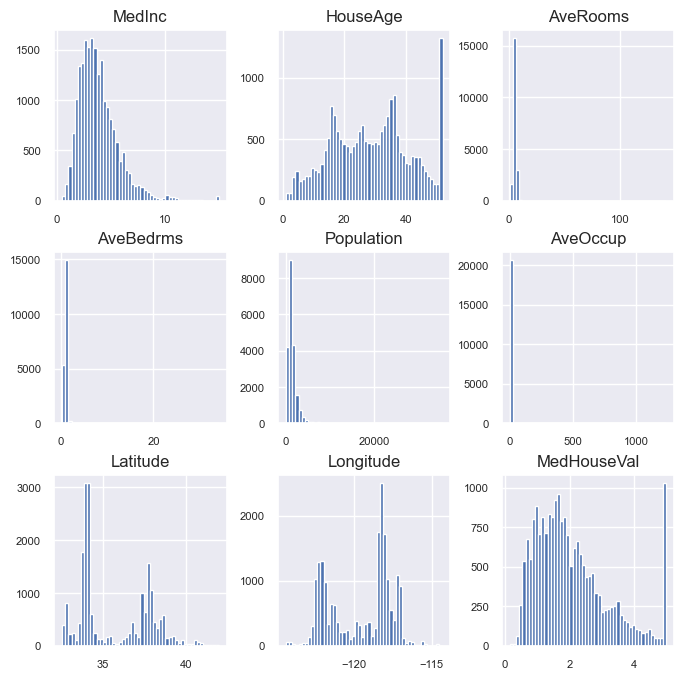

In [18]:
df_housing.hist(figsize=(8,8), xlabelsize=8, ylabelsize=8, bins=50)
plt.tight_layout()
plt.show()

*Podemos observar que hay datos que no siguen una distribución gausiana, sin embargo, hay otros que sí podrían seguir, como: MedInc e HouseAge, así como la variable objetivo.*

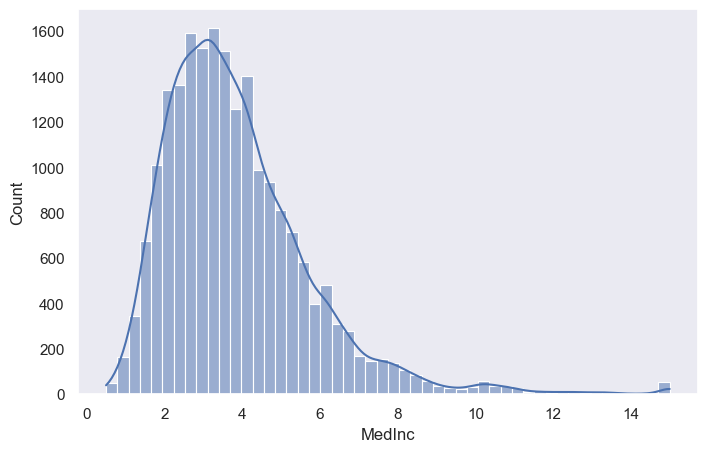

In [22]:
# Graficamos para el atributo MedInc
df_for_ploting = df_housing['MedInc']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

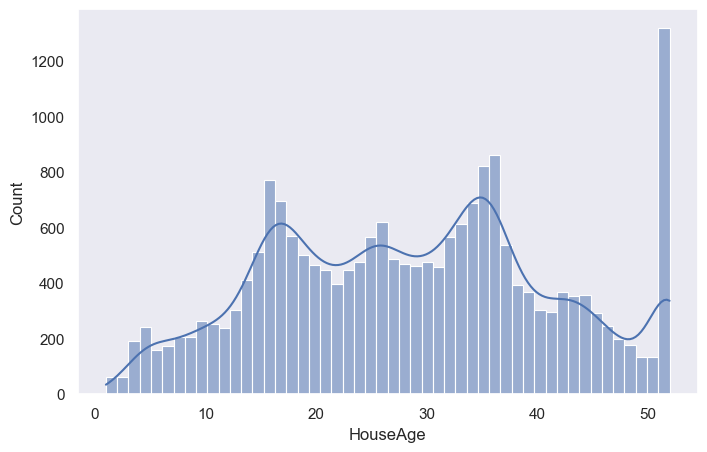

In [23]:
# Graficamos para el atributo HouseAge
df_for_ploting = df_housing['HouseAge']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

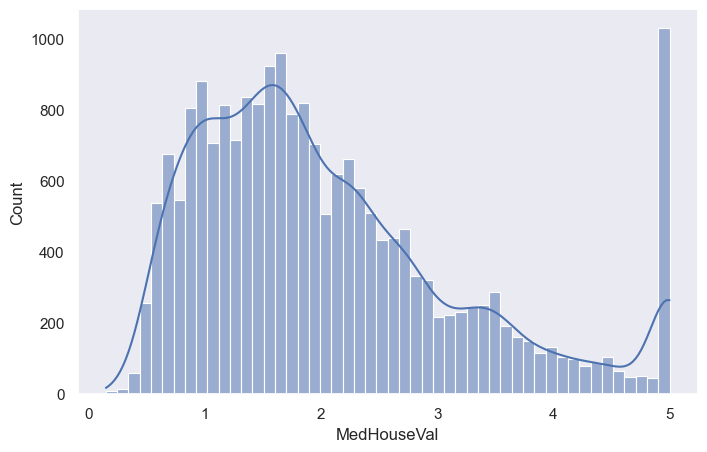

In [30]:
# Graficamos para el atributo MedHouseVal
df_for_ploting = df_housing['MedHouseVal']
plt.figure(figsize=(8, 5))
sns.histplot(data=df_for_ploting, kde=True, bins=50)
plt.show()

### Ejercicio 3:

> 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [31]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (14448, 8)
Valores de y_train: 14448
Dimension de X_test: (6192, 8)
Valores de y_test: 6192


In [32]:
# Escalo los datos.
sc_X = StandardScaler()

# Conjunto de entrenamiento.
X_train_scaled = sc_X.fit_transform(X_train)
# Conjunto de evaluación.
X_test_scaled = sc_X.transform(X_test)

print(f"Las medias del escalador es {sc_X.mean_}")
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Las medias del escalador es [ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]
Los desvío estándar del escalador es [1.90484248e+00 1.26131971e+01 2.45348438e+00 4.47482496e-01
 1.14018573e+03 1.23732074e+01 2.13566827e+00 2.00286090e+00]


In [33]:
# Entrenamiento.
regresion = LinearRegression()

regresion.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 2.0692396089424165
Los valores de los coeficientes de la recta sera [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [34]:
# Coeficiente de pearson.
print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

El coeficiente de Pearson es 0.609345972797216


In [35]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-6))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 0.7235848673999719


### Ejercicio 4:

> 4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

### Ejercicio 5:

> 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de $\alpha$, buscando entre [0, 12.5]. 
Graficar el valor de MSE versus $\alpha$.

### Ejercicio 6:

> 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?